<a href="https://colab.research.google.com/github/AmonAmanyabyona/AI_systems/blob/main/big_data_project_on_kafka_and_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting Up Kafka**

In [ ]:
!pip install tensorflow-io==0.23.1
!pip install tensorflow==2.8.0-rc0
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.36.0
    Uninstalling tensorflow-io-gcs-filesystem-0.36.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.36.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.8/952.8 kB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.8 MB/s eta 0:00:00


**Importing useful libraries**

In [ ]:
import os
from datetime import datetime
import time
import threading
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio

**Downloading the Kafka distribution for version 3.3.1 and extracting its contents**

In [ ]:
!curl -sSOL https://archive.apache.org/dist/kafka/3.3.1/kafka_2.13-3.3.1.tgz
!tar -xzf kafka_2.13-3.3.1.tgz

**Starting the Zookeeper server that is bundled with Kafka**

In [ ]:
!./kafka_2.13-3.3.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.3.1/config/zookeeper.properties
!./kafka_2.13-3.3.1/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.3.1/config/server.properties

 **Creating Kafka topics for each stock ticker**

In [ ]:
import os

stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'IBM', 'NVDA', 'INTC', 'CSCO', 'WMT',
                 'DIS', 'MA', 'KO', 'NKE', 'MDC', 'SBUX', 'BA', 'TM', 'NFLX', 'GME', 'BTC-CAD', 'ROKU',
                 'BAC', 'GE', 'DAL', 'AAP', 'AMD', 'VGT', 'ADBE', 'PYPL', 'F', 'STLA', 'HMC', 'HYMTF',
                 'CMCSA', 'PFE', 'JPM', 'SPG', 'CVX', 'V', 'HD', 'GS', 'FORD', 'T', 'MS', 'SNAP', 'C', 'GOOG',
                 'MMM', 'XOM', 'TWTR', 'AMAT', 'GM', 'MSI', 'WFC', 'NOK', 'VZ', 'COST', 'CVS', 'PEP']

print(len(stock_tickers))

for ticker in stock_tickers:
  topic = str('./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ') +  ticker
  print(topic)


  #Runs on the operating system creating the Kafka topic for the current ticker
  os.system(topic)

  #pauses the execution for a 2 seconds to avoid errors and congestion since we have a loop
  os.system('sleep 2')

61
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic AAPL
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic MSFT
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic GOOGL
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic AMZN
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic FB
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic TSLA
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic IBM
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 1

**Downloading and combining the historical data of multiple stocks and the S&P 500 index from Yahoo Finance**

In [ ]:
import yfinance as yf
import pandas as pd
# List of stock tickers
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'IBM', 'NVDA', 'INTC', 'CSCO', 'WMT',
                 'DIS', 'MA', 'KO', 'NKE', 'MDC', 'SBUX', 'BA', 'TM', 'NFLX', 'GME', 'BTC-CAD', 'ROKU',
                 'BAC', 'GE', 'DAL', 'AAP', 'AMD', 'VGT', 'ADBE', 'PYPL', 'F', 'STLA', 'HMC', 'HYMTF',
                 'CMCSA', 'PFE', 'JPM', 'SPG', 'CVX', 'V', 'HD', 'GS', 'FORD', 'T', 'MS', 'SNAP', 'C', 'GOOG',
                 'MMM', 'XOM', 'TWTR', 'AMAT', 'GM', 'MSI', 'WFC', 'NOK', 'VZ', 'COST', 'CVS', 'PEP']
# Set start and end dates
start_date = "2023-01-01"
end_date = "2024-01-01"

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Download historical data for the specified ticker symbols
for ticker in stock_tickers:
    try:
        # Get historical data for the specific date range
        ticker_data = yf.download(ticker, start=start_date, end=end_date)

        # Add the 'Ticker' column for identification
        ticker_data['Ticker'] = ticker

        # Append the data to the combined DataFrame
        combined_data = combined_data.append(ticker_data, sort=False)

    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

# Download historical data for the S&P 500  i.e '^GSPC':is the ticker symbol for the S&P 500 index, which is a benchmark of the US stock market.
try:
    print('Getting historical data for the S&P 500')
    sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
    sp500_data['Ticker'] = 'MarketReturns'
    combined_data = combined_data.append(sp500_data, sort=False)
except Exception as e:
    print(f"Error downloading data for S&P 500: {e}")

# Print the combined data
print("Combined Data for Multiple Stocks:")
print(combined_data)


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
<ipython-input-6-f82ae79e5ab0>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(ticker_data, sort=False)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-6-f82ae79e5ab0>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(ticker_data, sort=False)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-6-f82ae79e5ab0>:26: FutureWarning: The frame.append method is 

Getting historical data for the S&P 500
Combined Data for Multiple Stocks:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-03   130.279999   130.899994   124.169998   125.070000   124.374802   
2023-01-04   126.889999   128.660004   125.080002   126.360001   125.657639   
2023-01-05   127.129997   127.769997   124.760002   125.019997   124.325081   
2023-01-06   126.010002   130.289993   124.889999   129.619995   128.899521   
2023-01-09   130.470001   133.410004   129.889999   130.149994   129.426575   
...                 ...          ...          ...          ...          ...   
2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883  4754.629883   
2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000  4774.750000   
2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078  4781.580078   
2023-12-28  4786.439941  4793.299805  4780.979980  4783.

In [ ]:
print(combined_data)
#Print the columns of the Pandas DataFrame
#Notice that in your DataFrame, the 'Date' is set as the index rather than a regular column.
#In Pandas, when you use the set_index('Date') function, it sets the 'Date' column as the index.

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-03   130.279999   130.899994   124.169998   125.070000   124.374802   
2023-01-04   126.889999   128.660004   125.080002   126.360001   125.657639   
2023-01-05   127.129997   127.769997   124.760002   125.019997   124.325081   
2023-01-06   126.010002   130.289993   124.889999   129.619995   128.899521   
2023-01-09   130.470001   133.410004   129.889999   130.149994   129.426575   
...                 ...          ...          ...          ...          ...   
2023-12-22  4753.919922  4772.939941  4736.770020  4754.629883  4754.629883   
2023-12-26  4758.859863  4784.720215  4758.450195  4774.750000  4774.750000   
2023-12-27  4773.450195  4785.390137  4768.899902  4781.580078  4781.580078   
2023-12-28  4786.439941  4793.299805  4780.979980  4783.350098  4783.350098   
2023-12-29  4782.879883  4788.430176  4751.990234  4

 **Visualization**

**Plotting time series for each stock individually**

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker'], dtype='object')


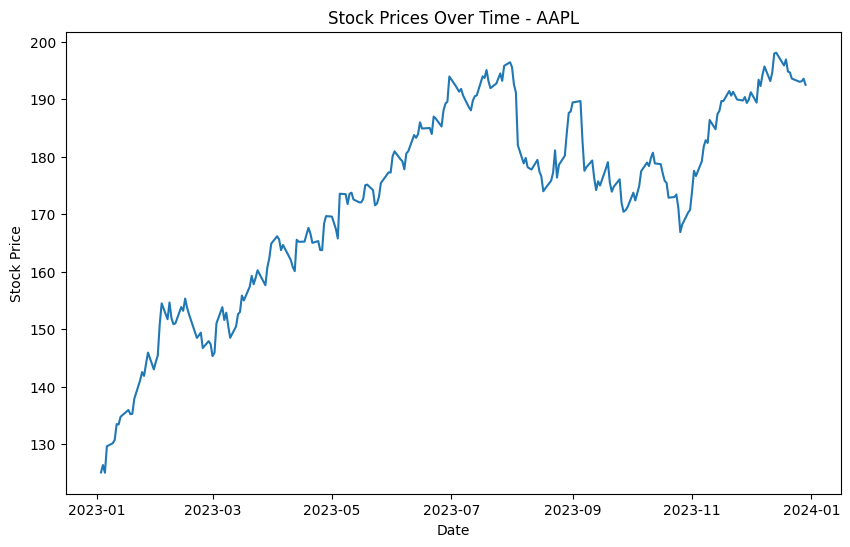

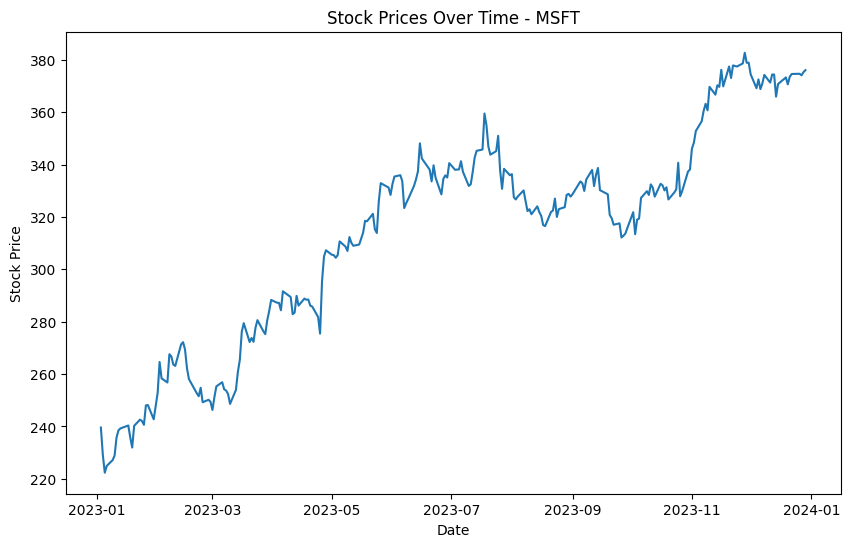

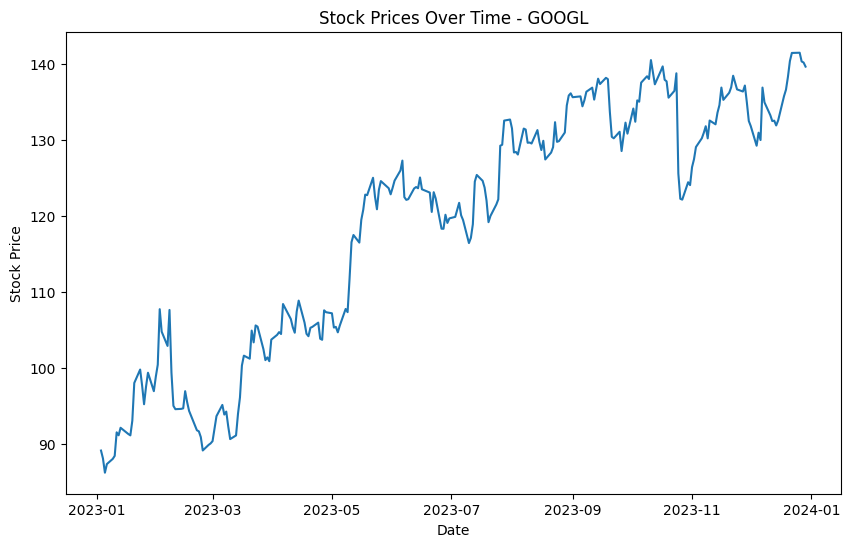

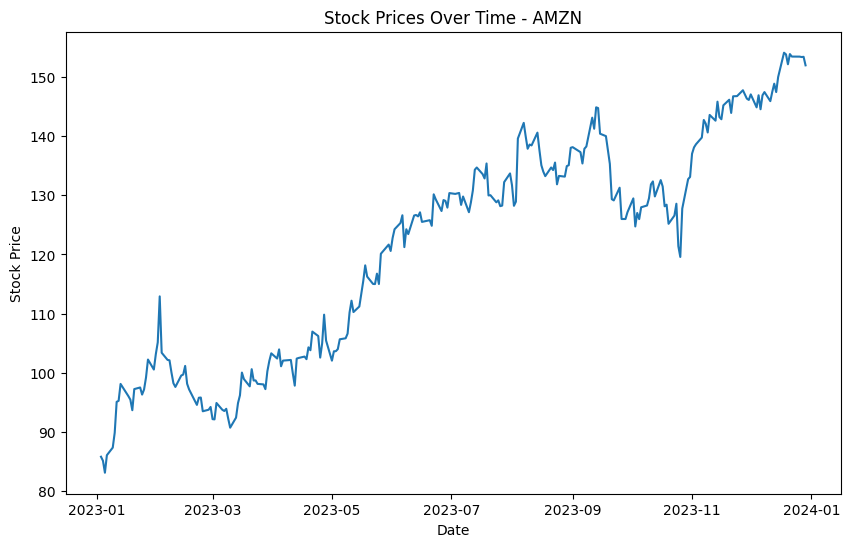

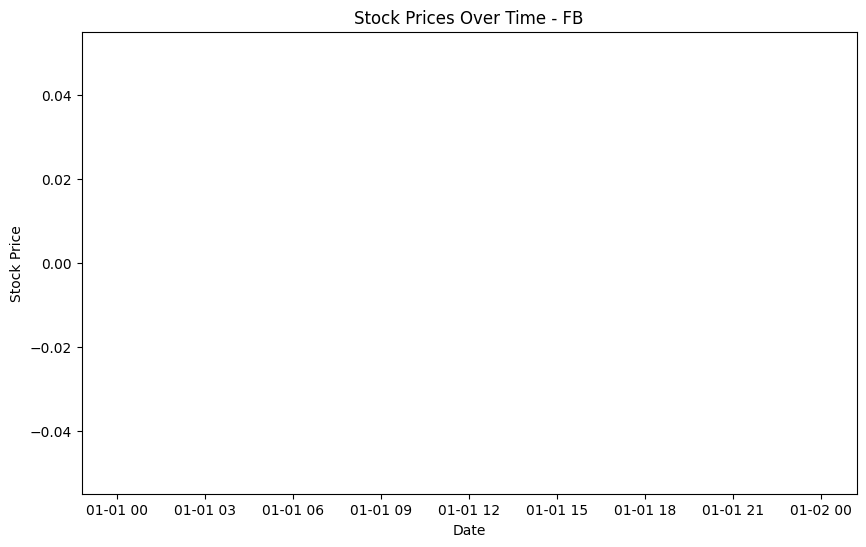

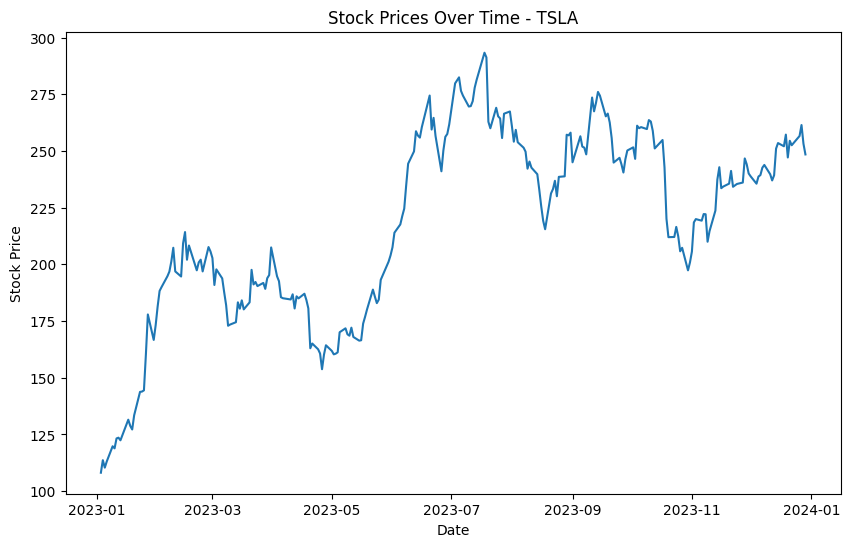

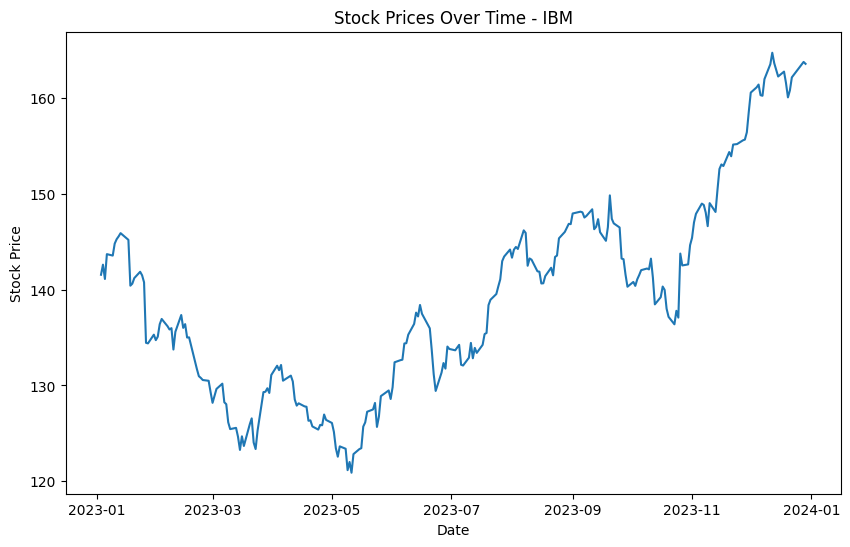

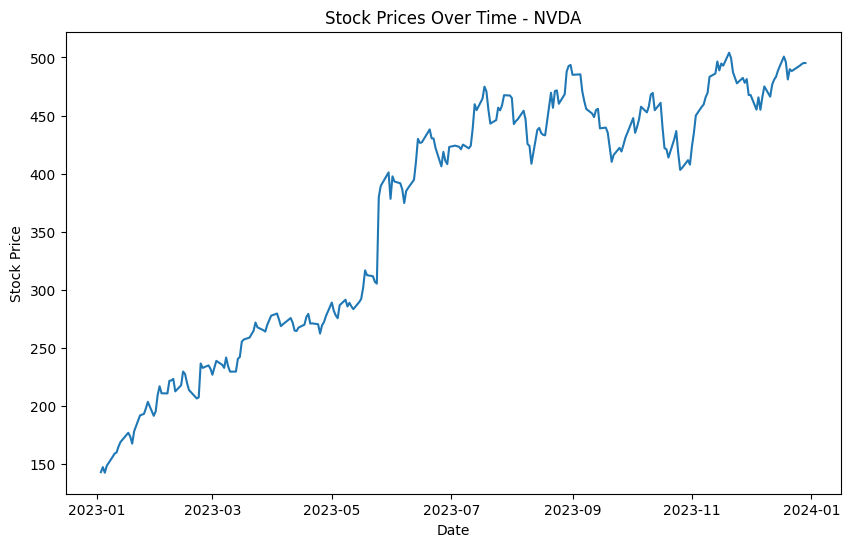

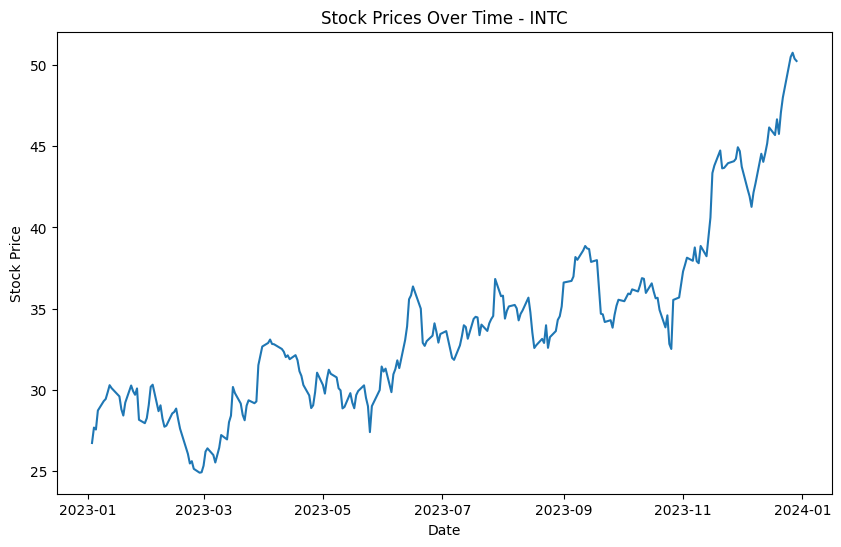

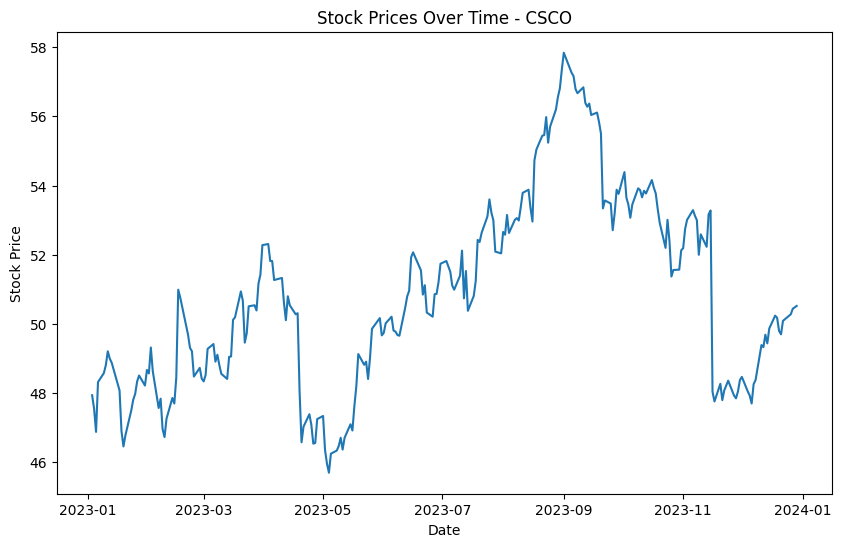

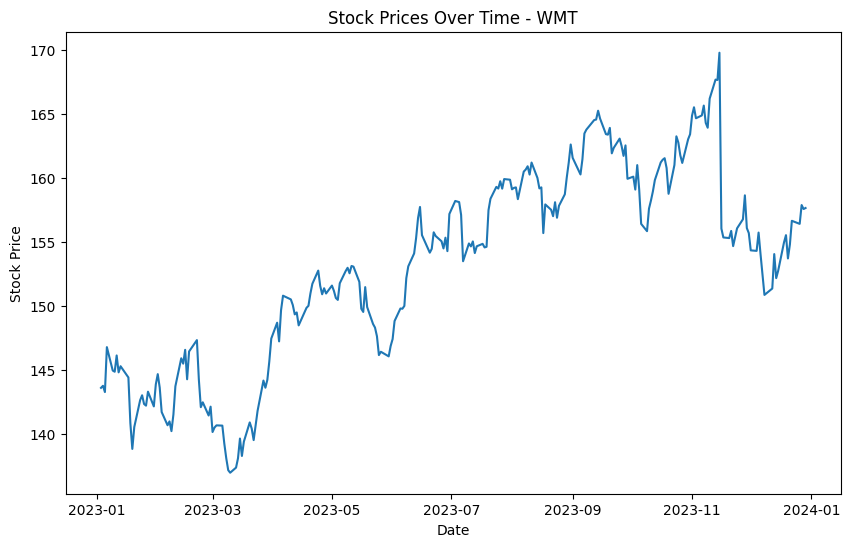

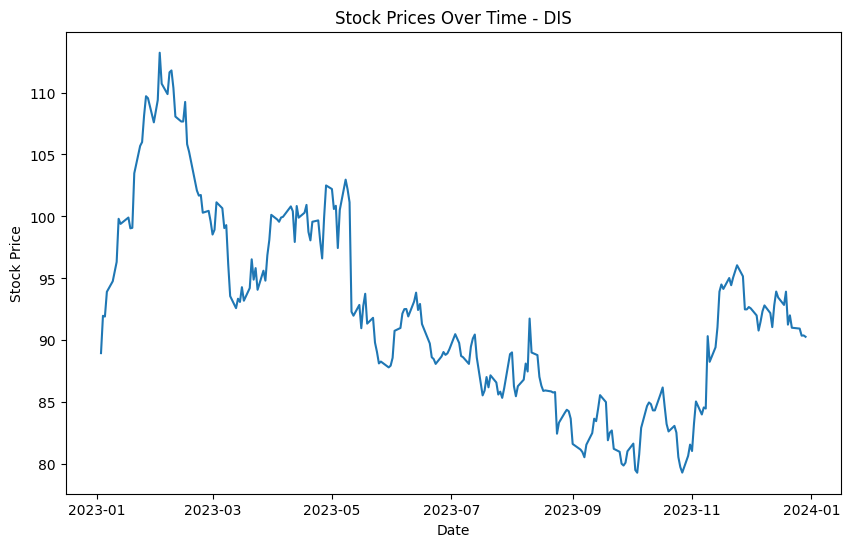

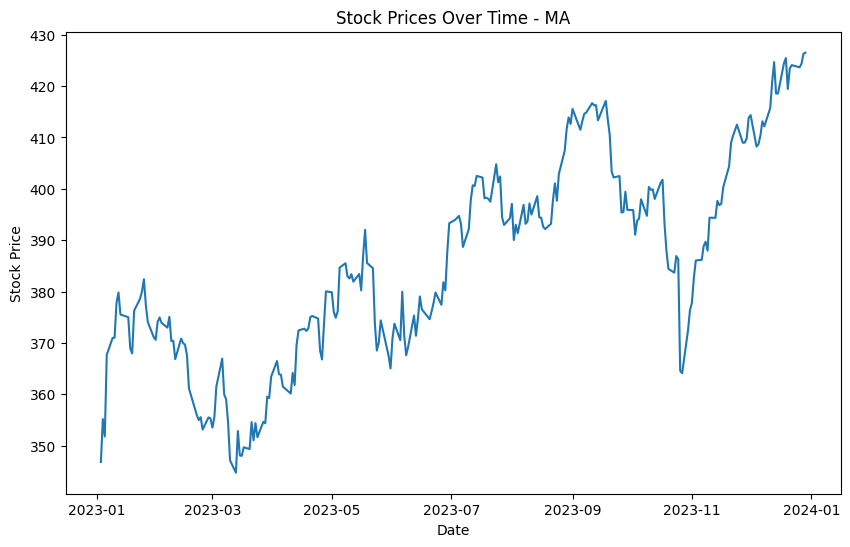

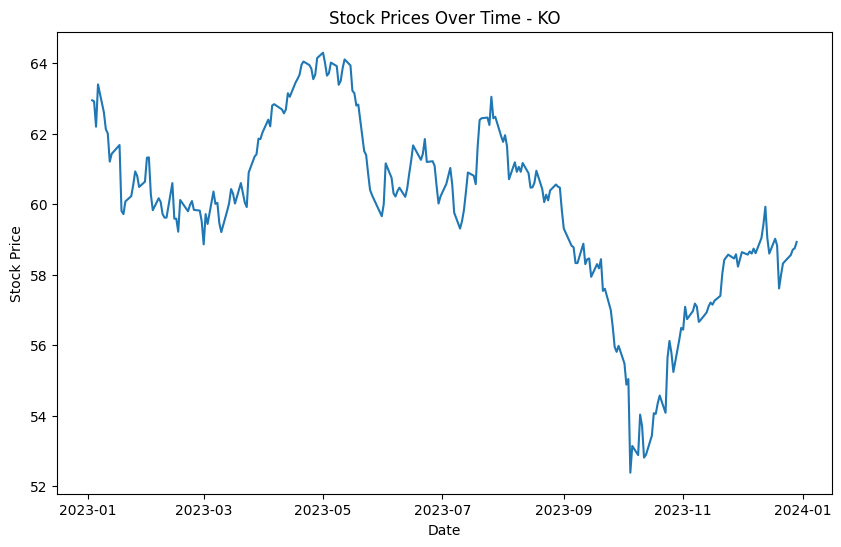

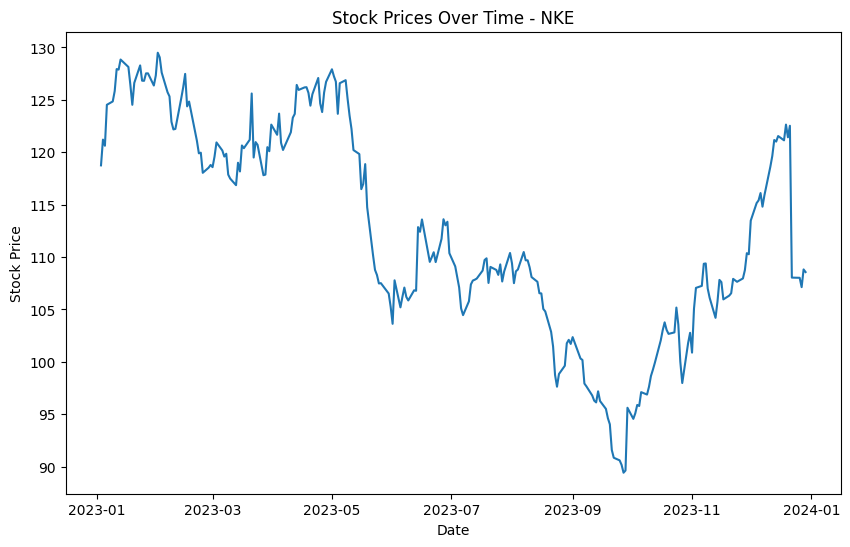

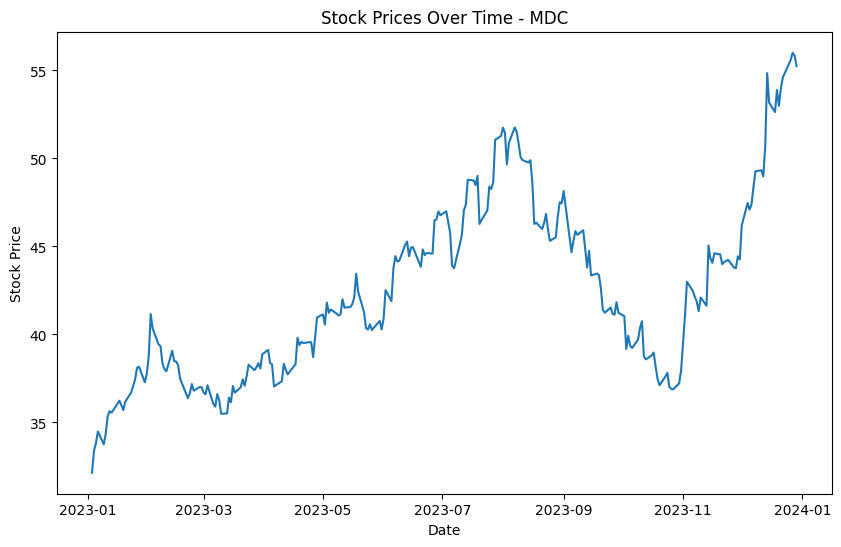

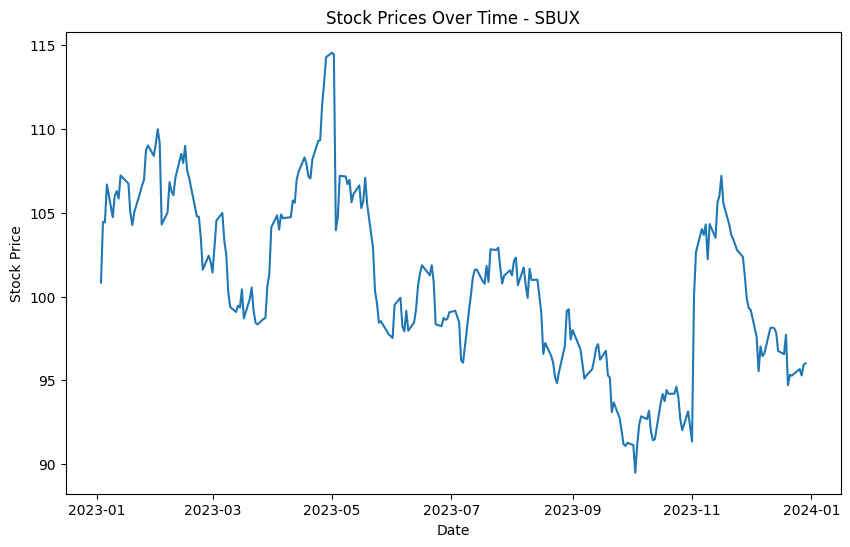

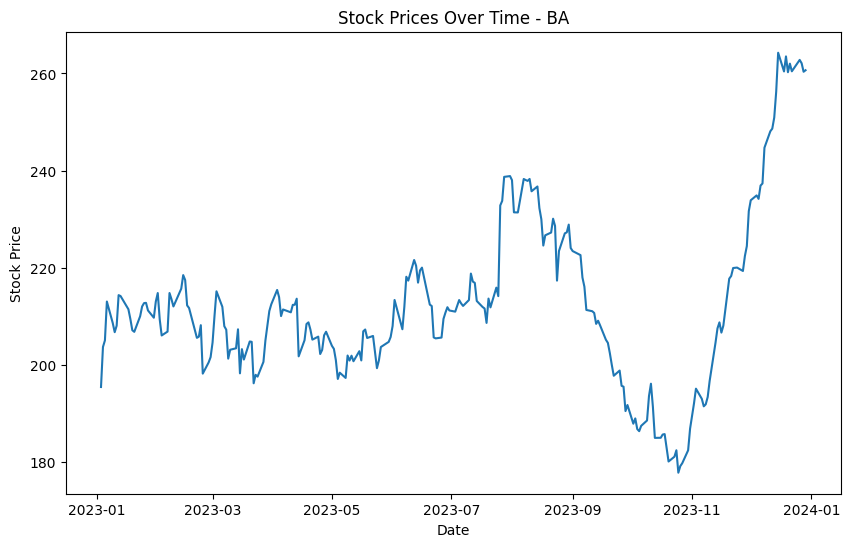

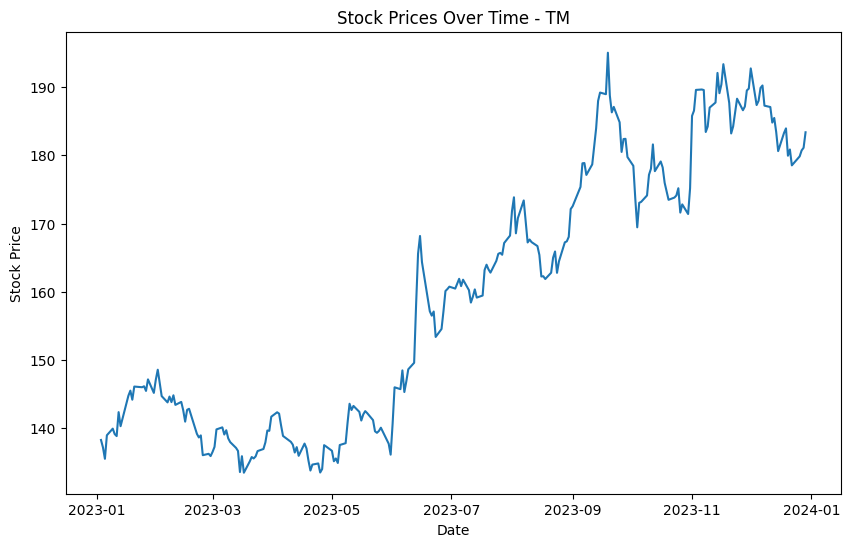

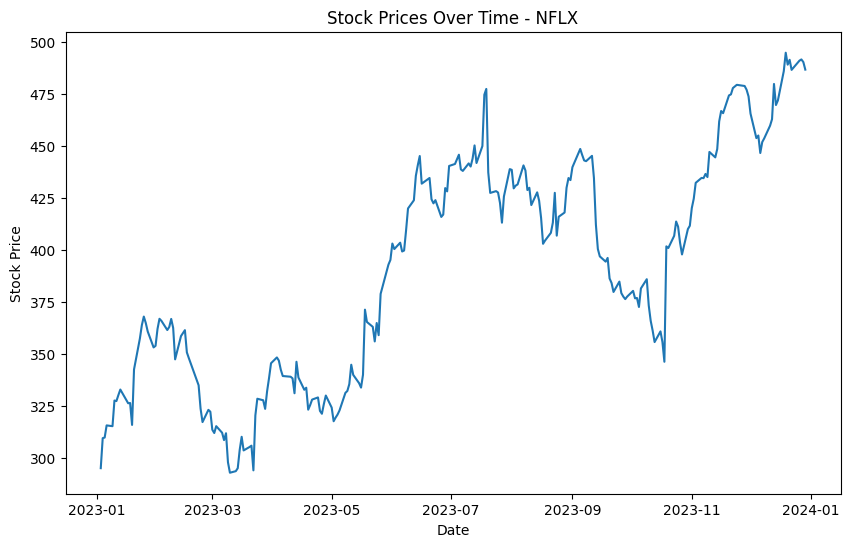

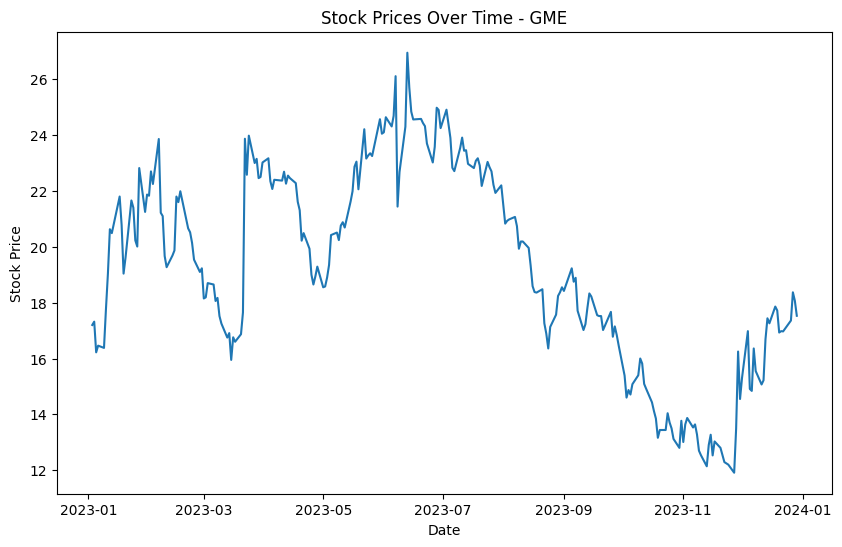

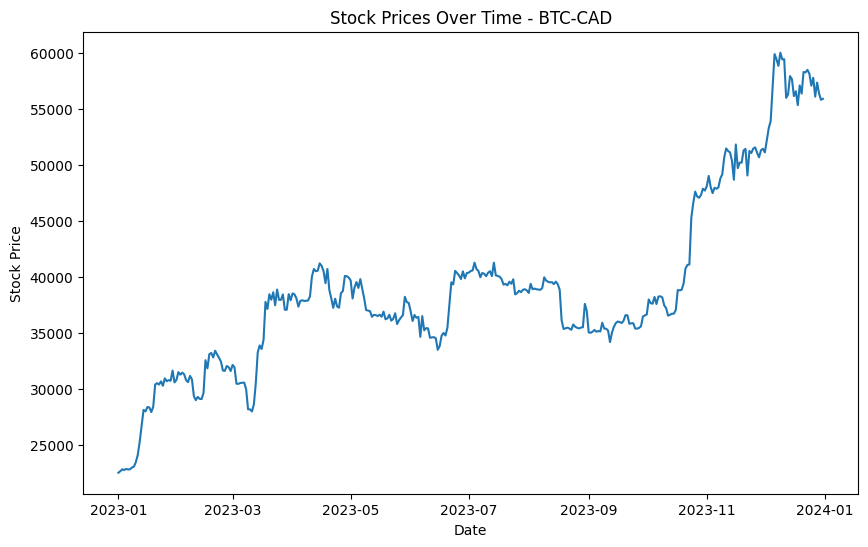

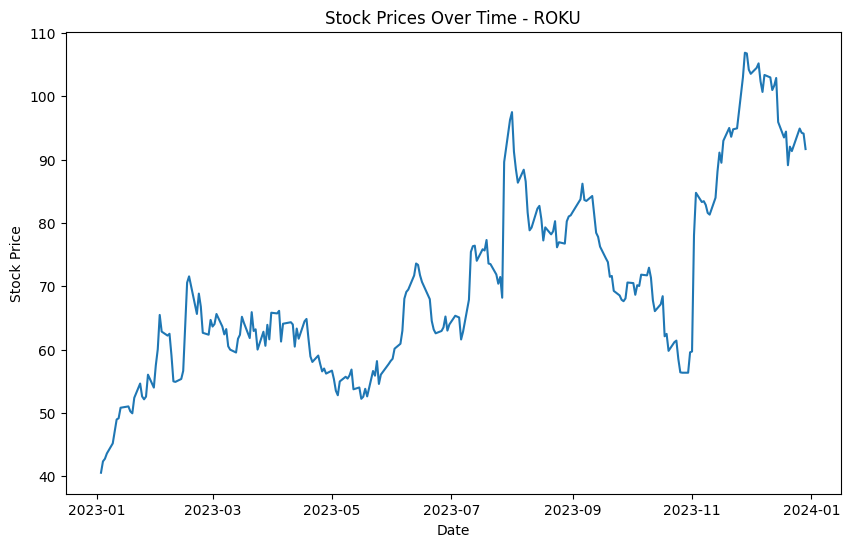

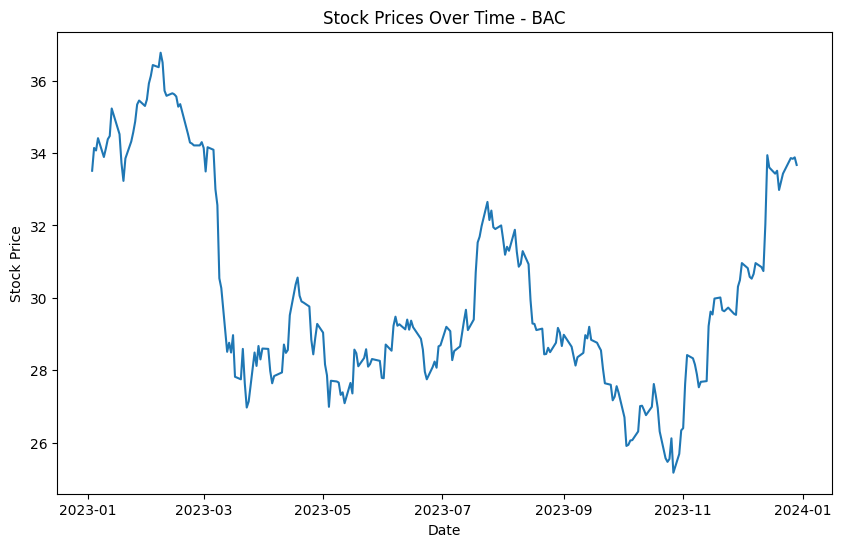

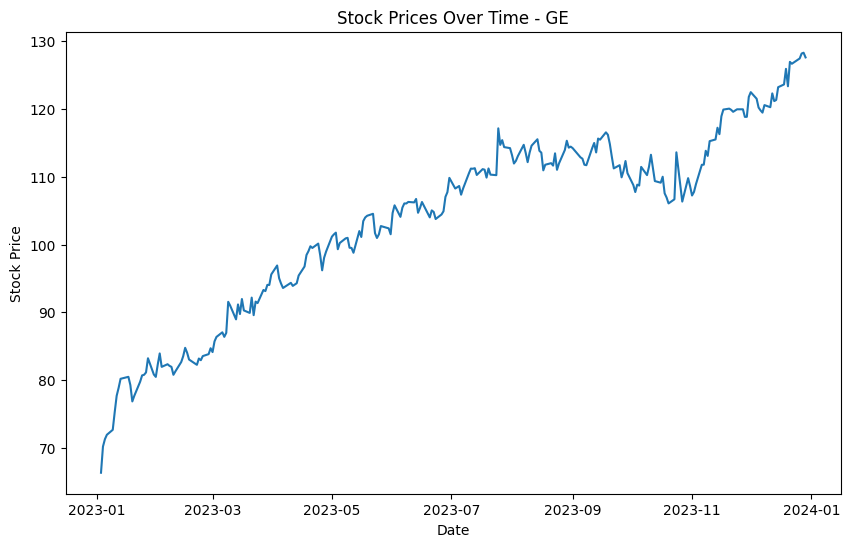

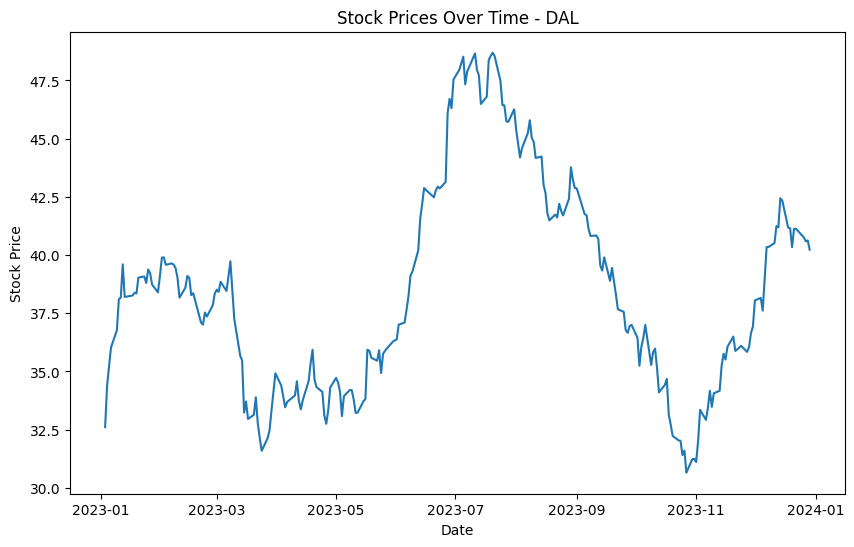

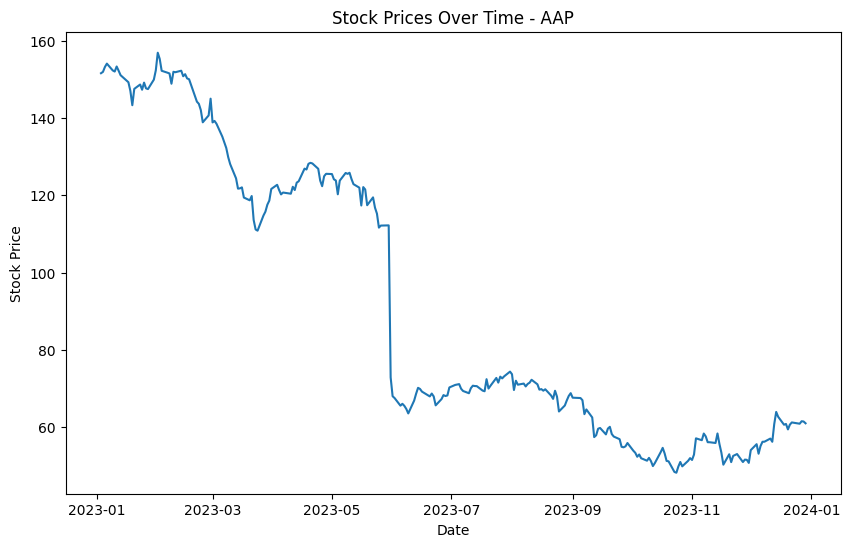

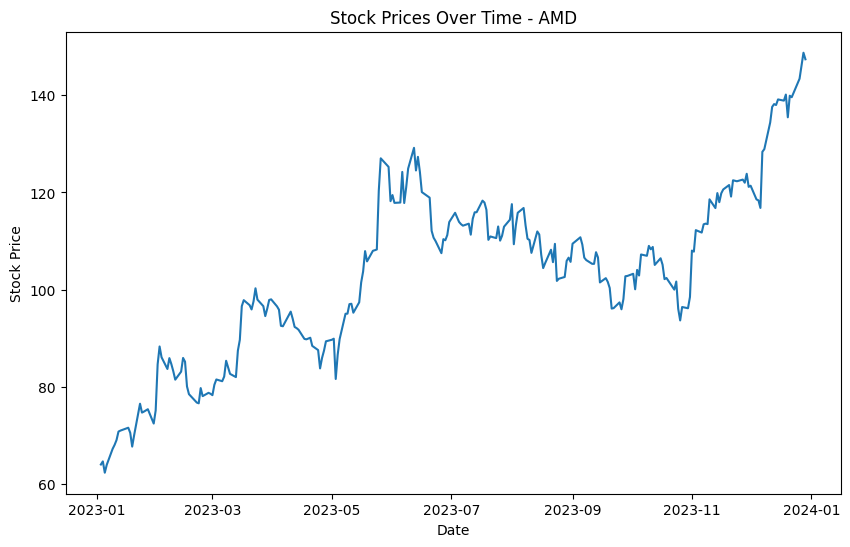

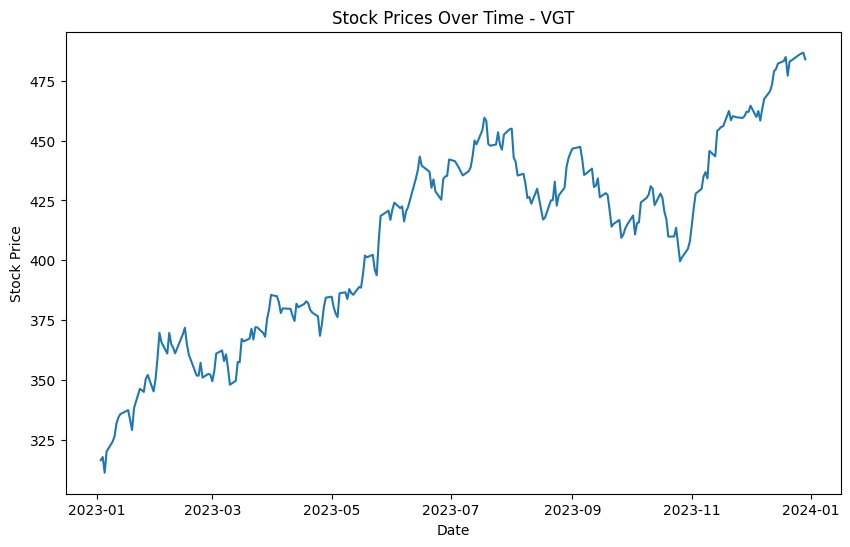

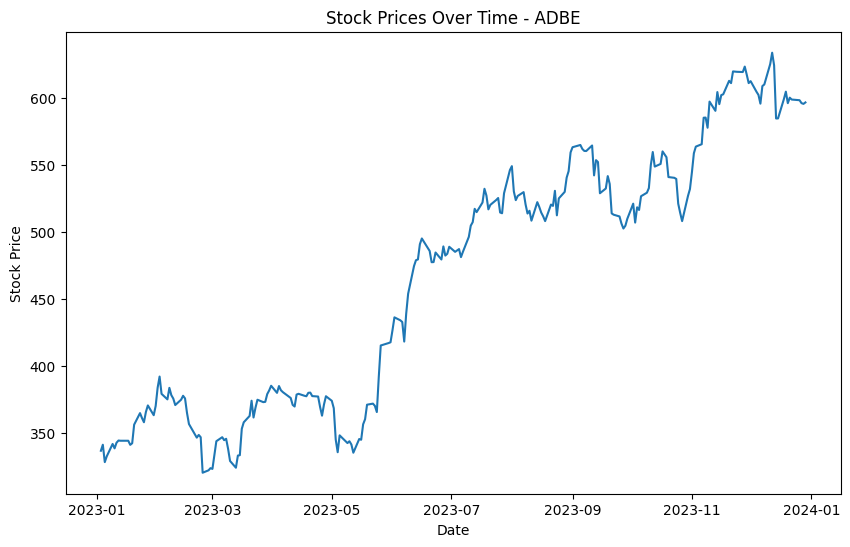

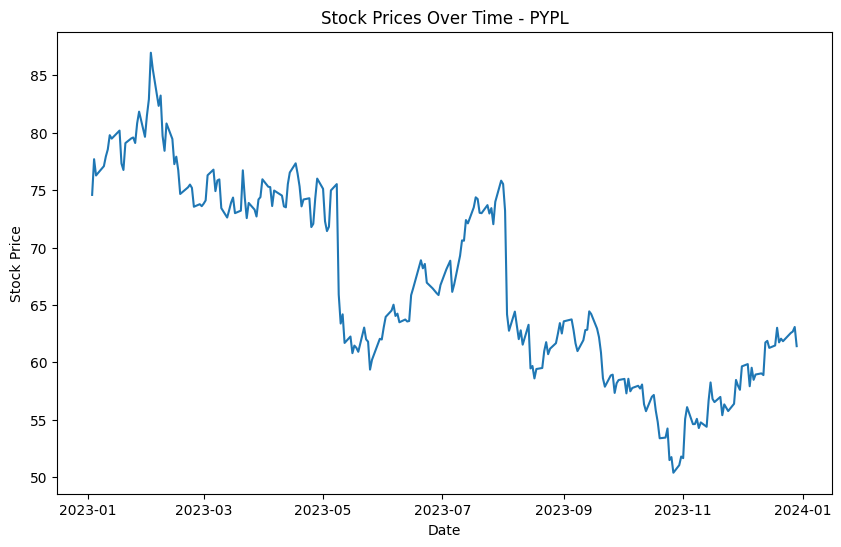

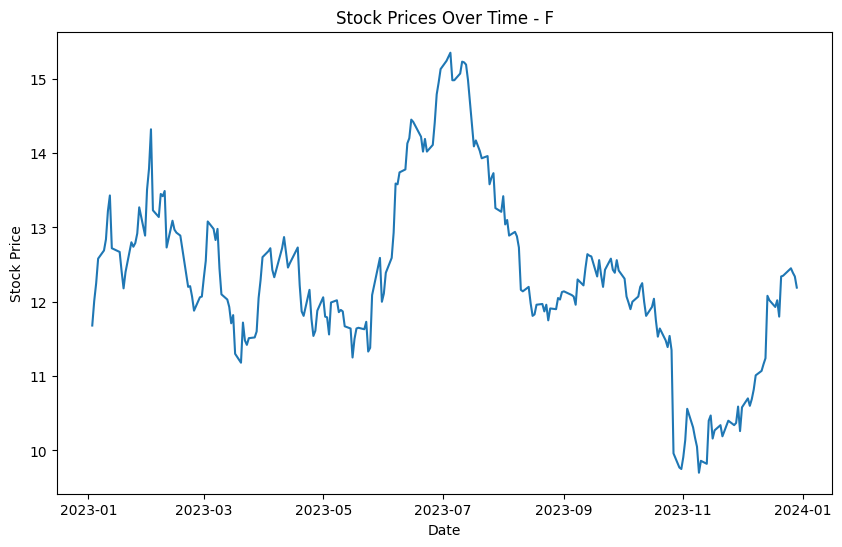

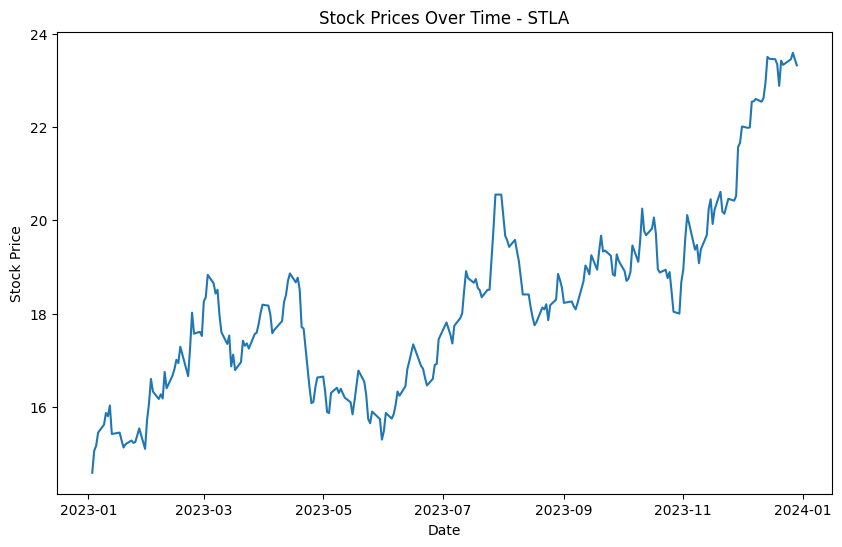

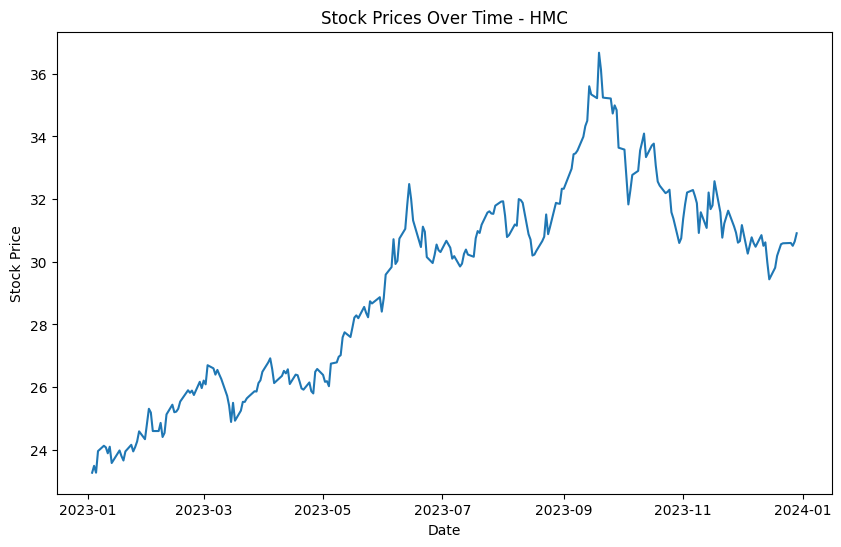

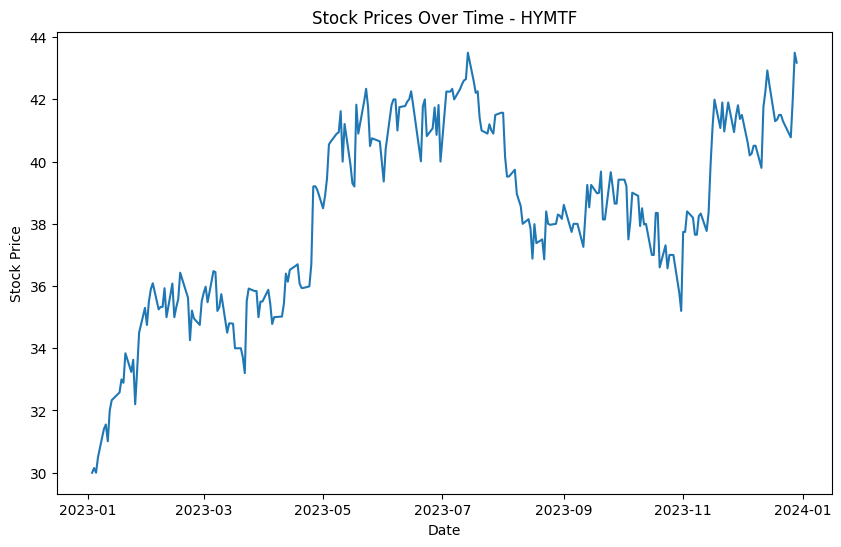

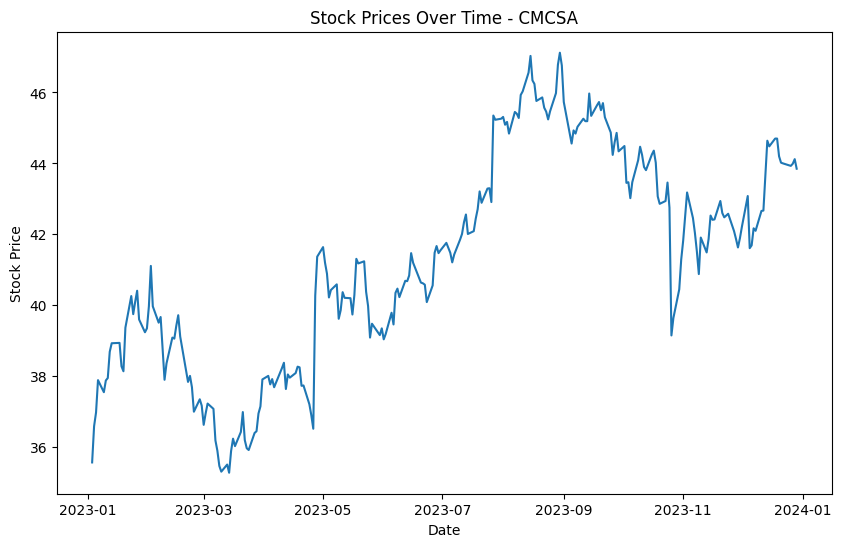

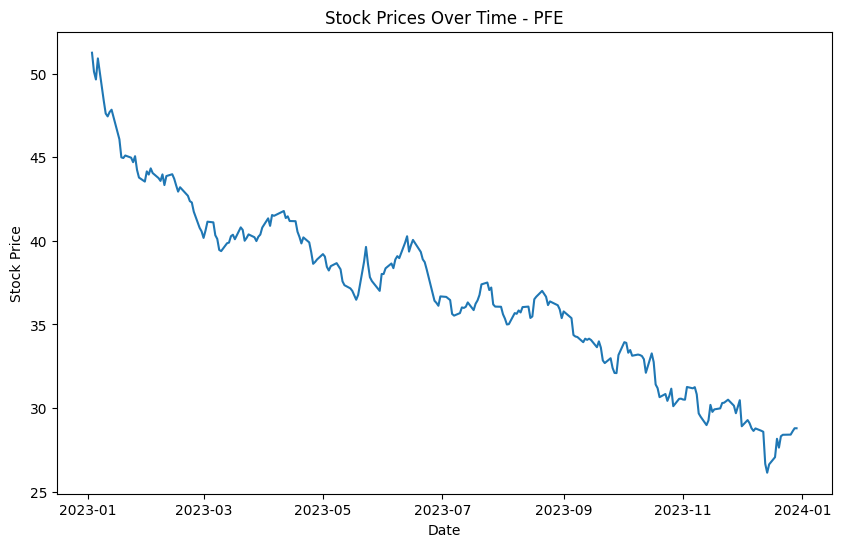

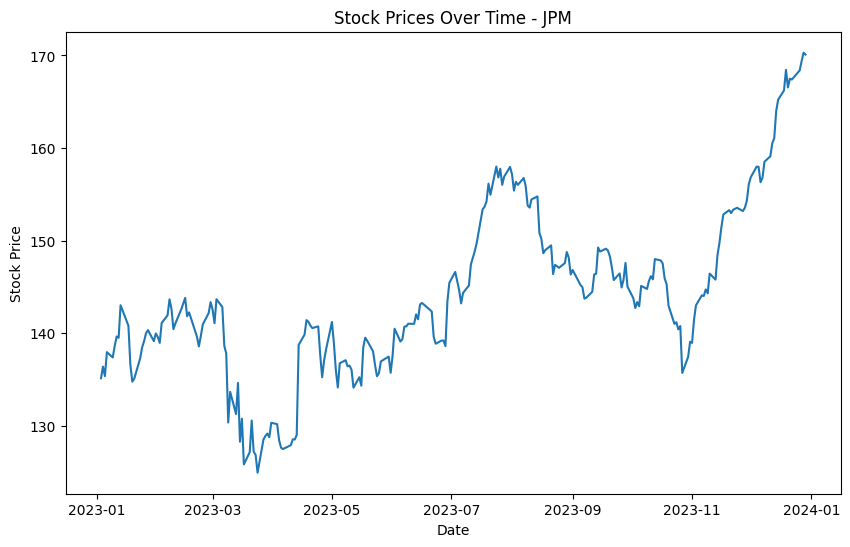

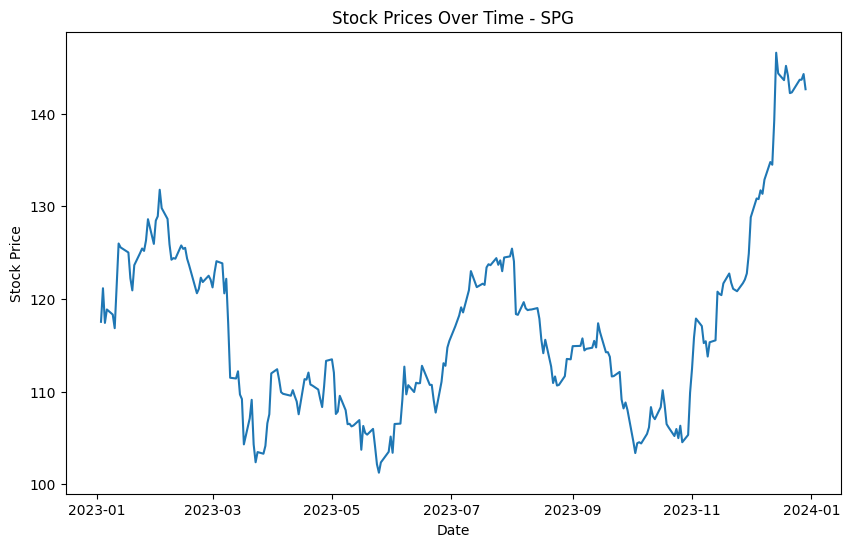

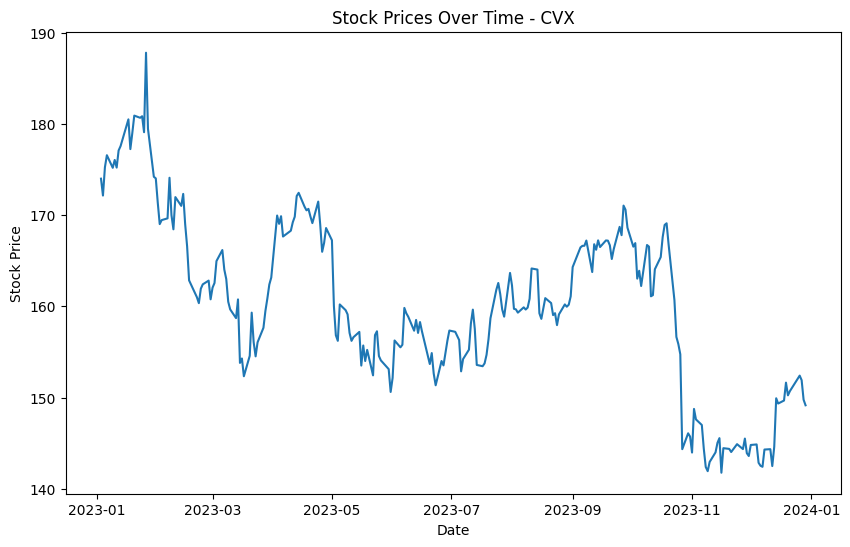

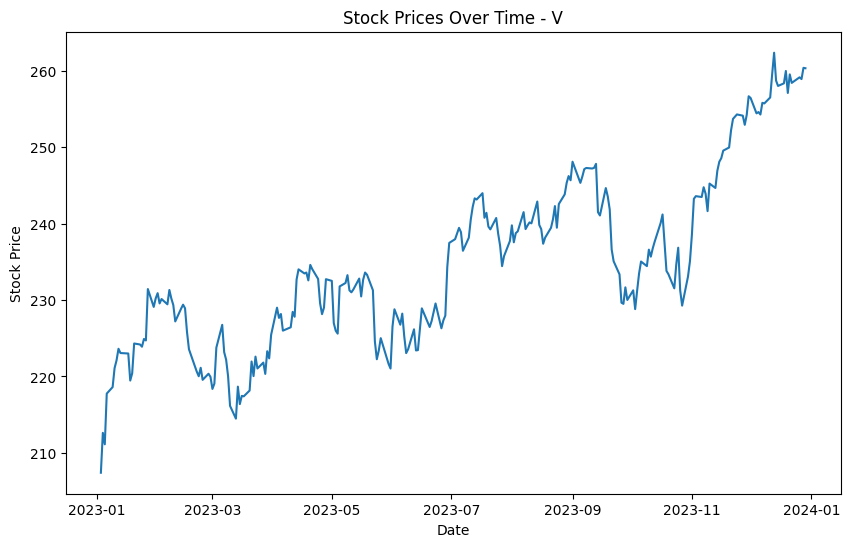

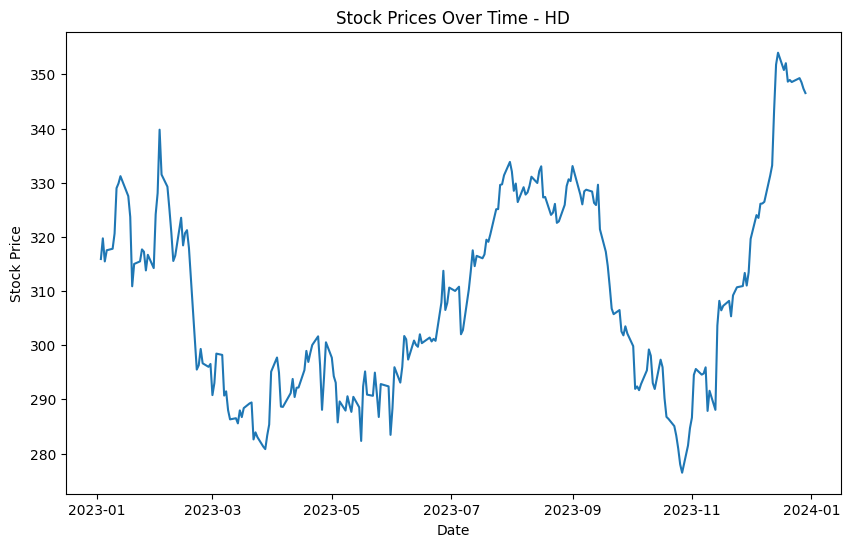

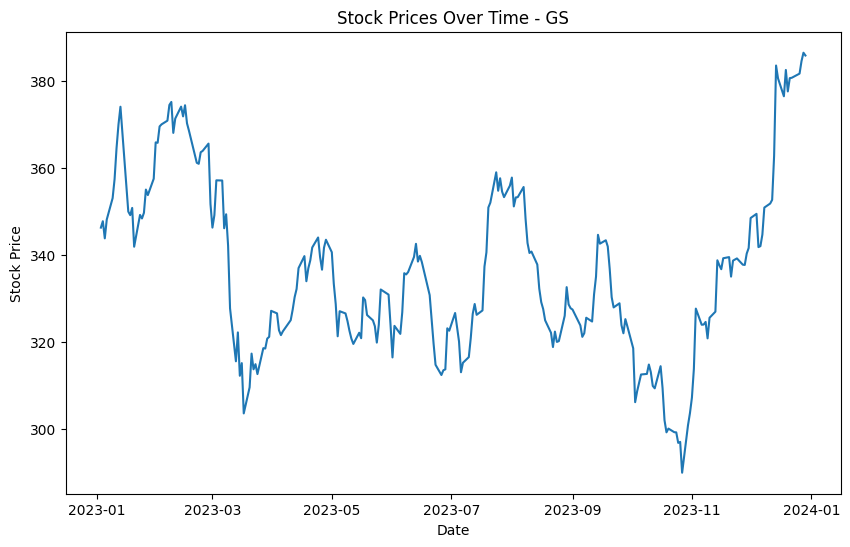

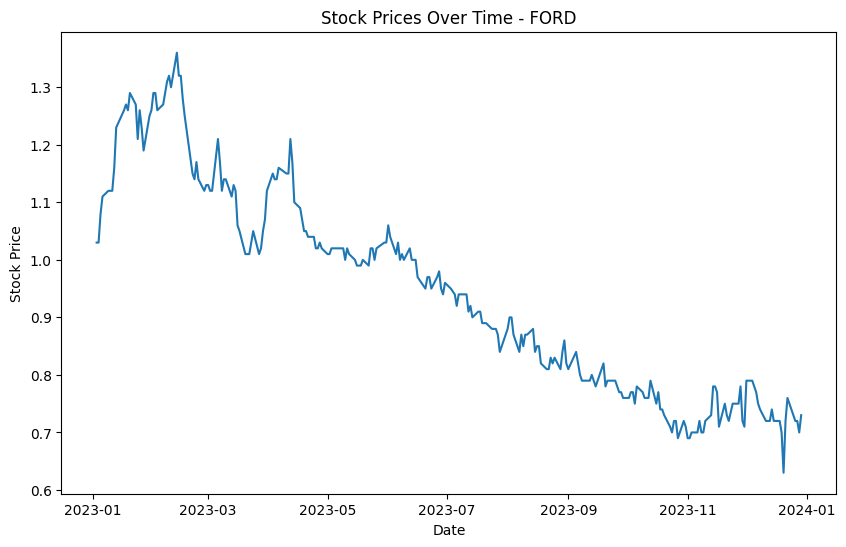

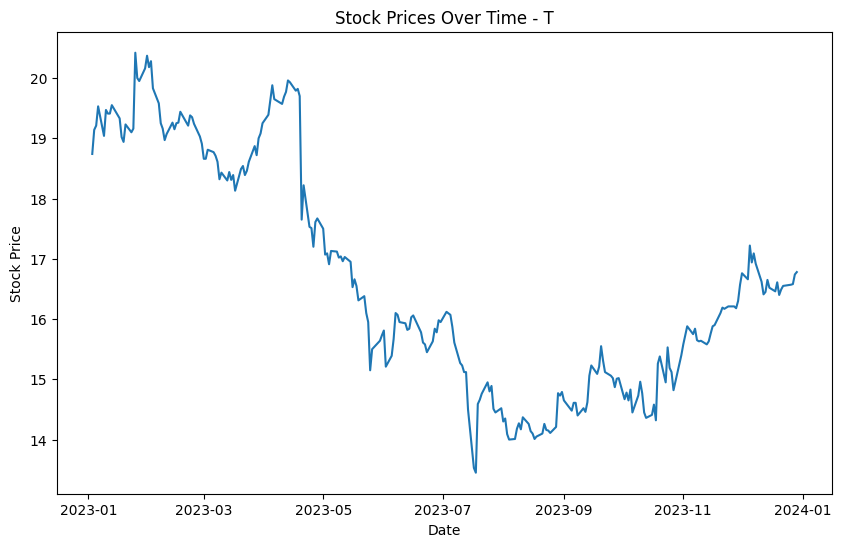

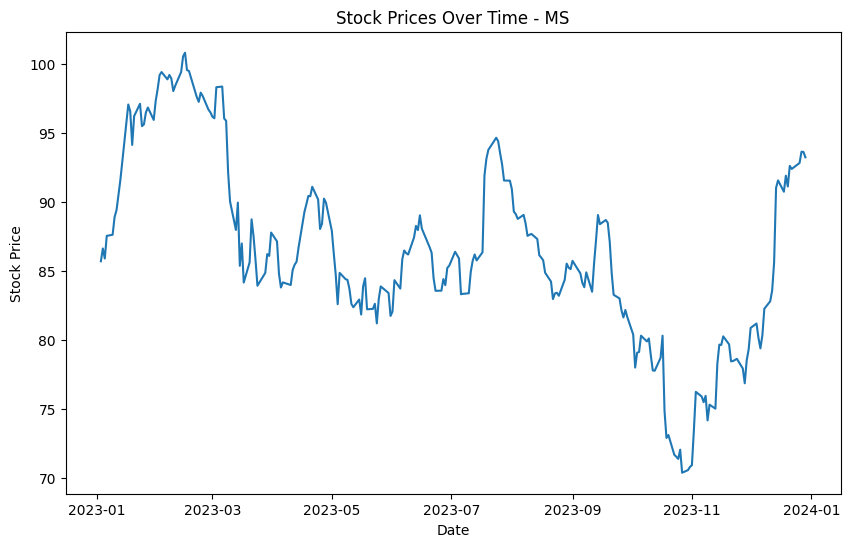

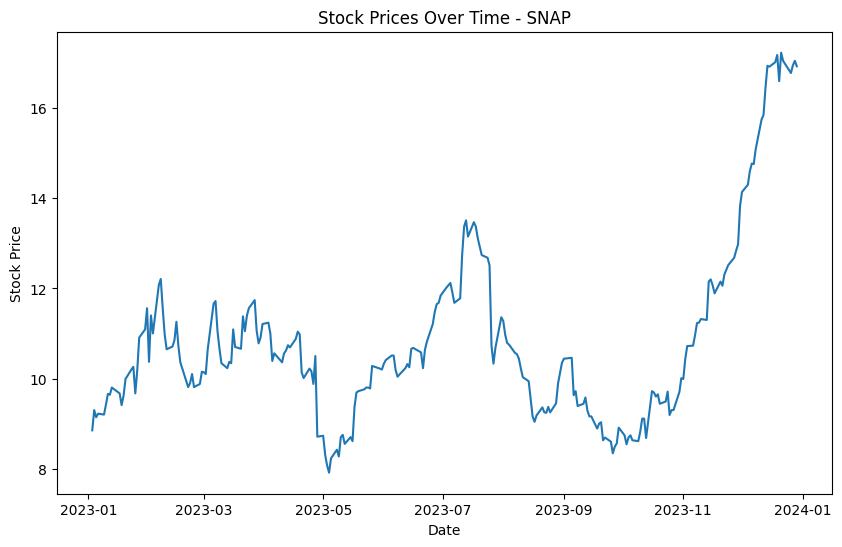

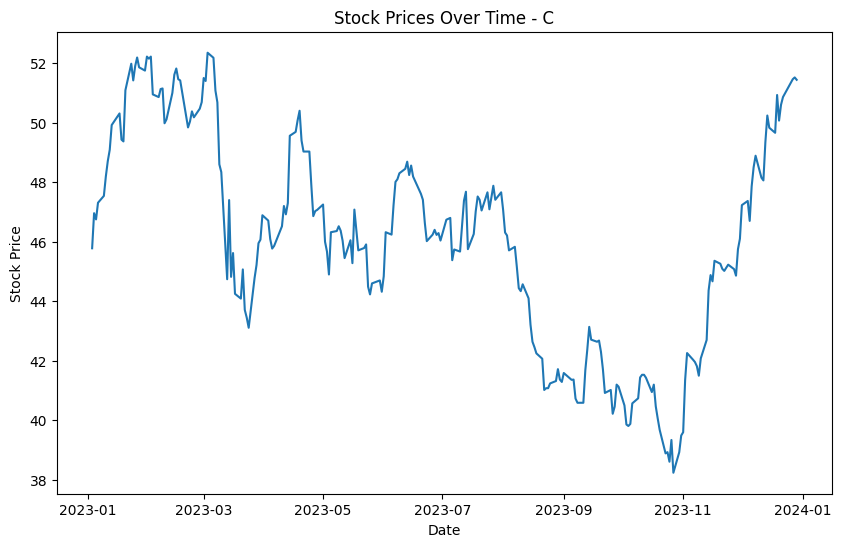

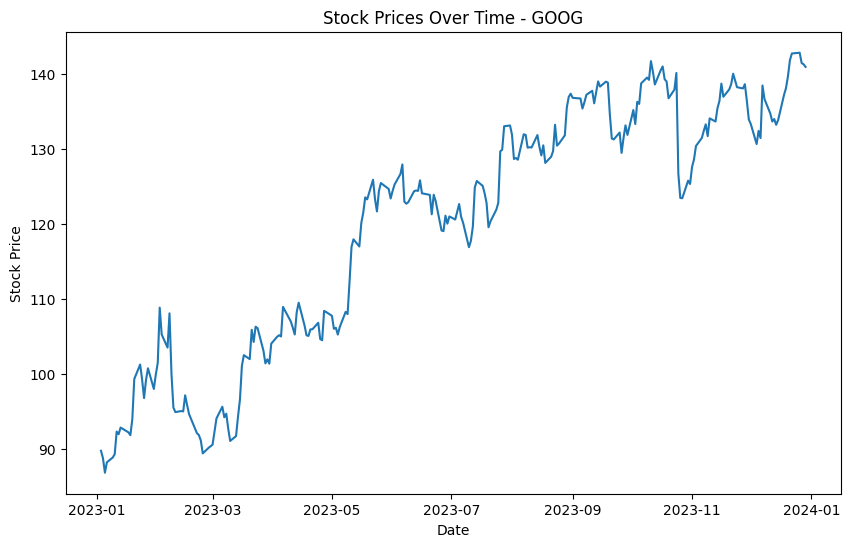

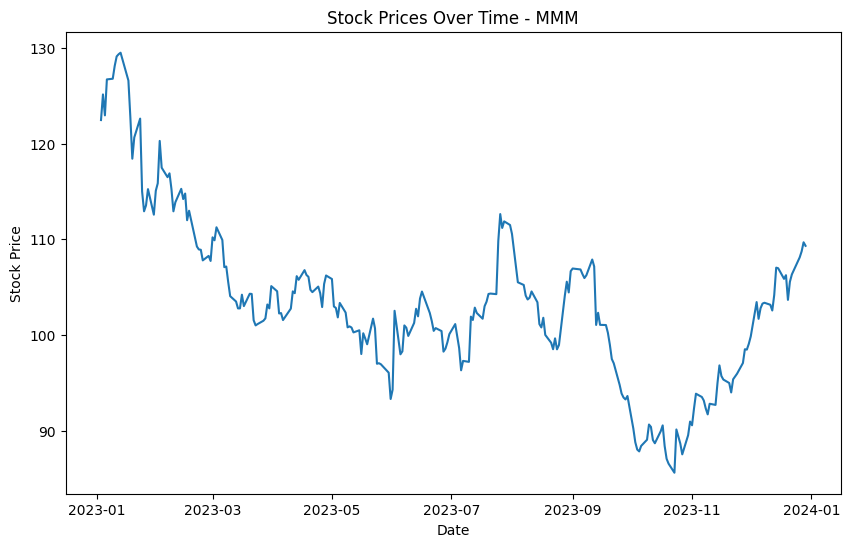

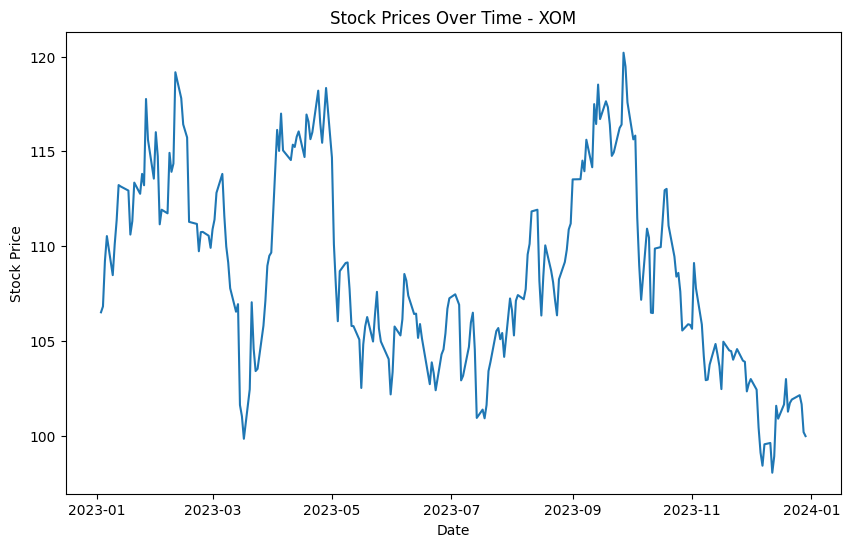

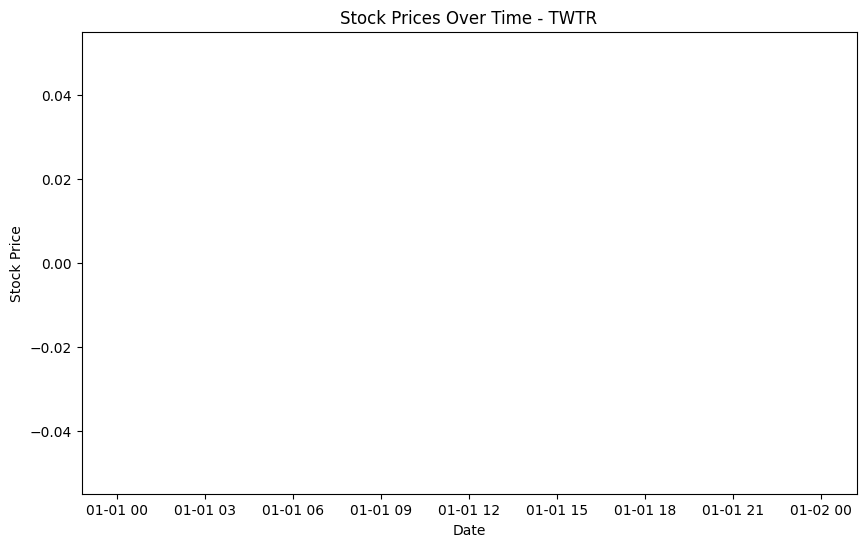

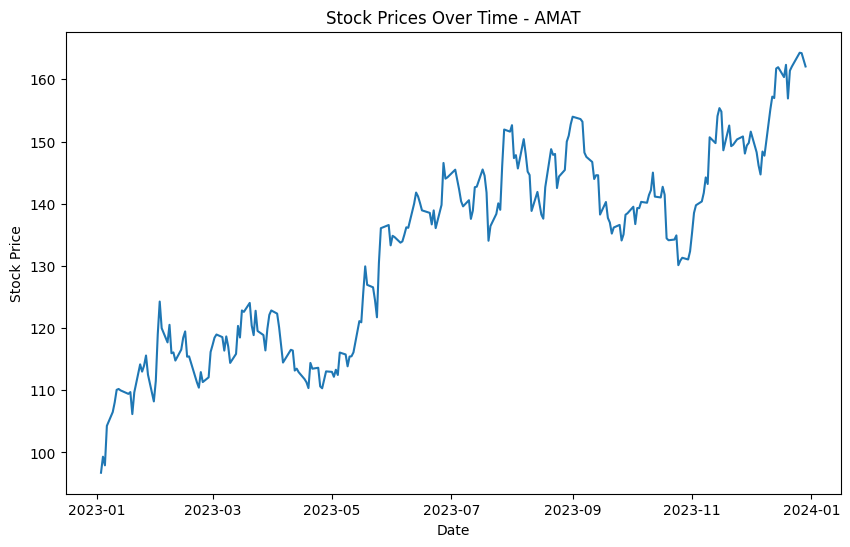

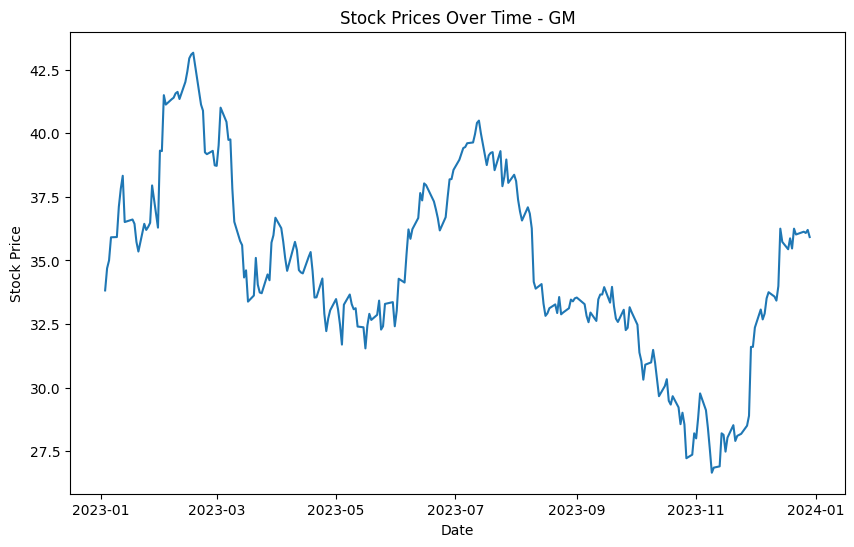

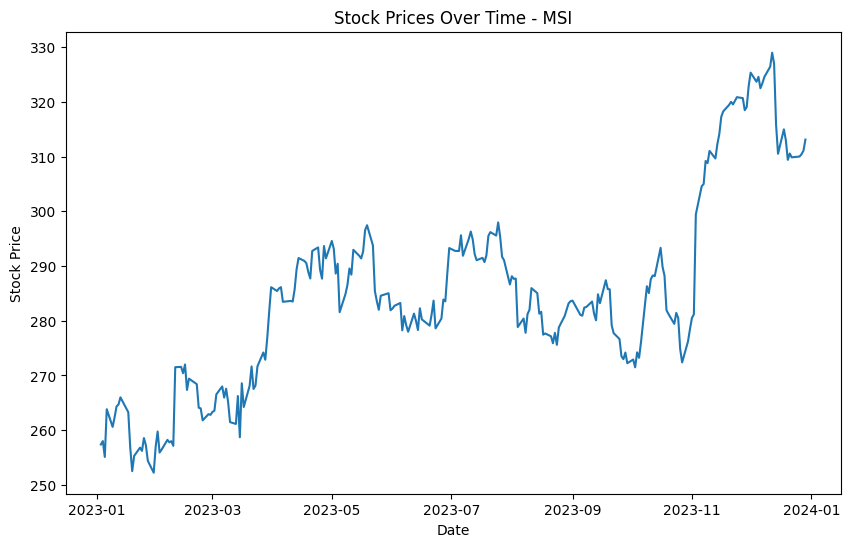

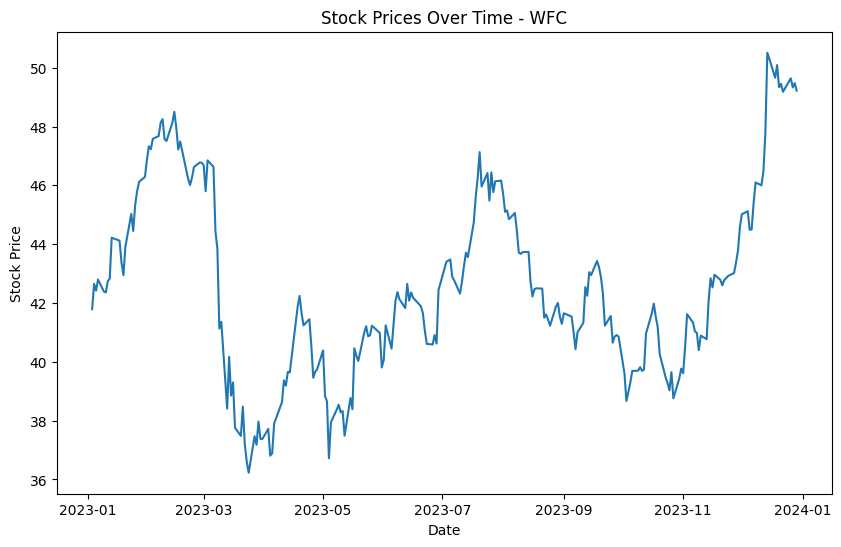

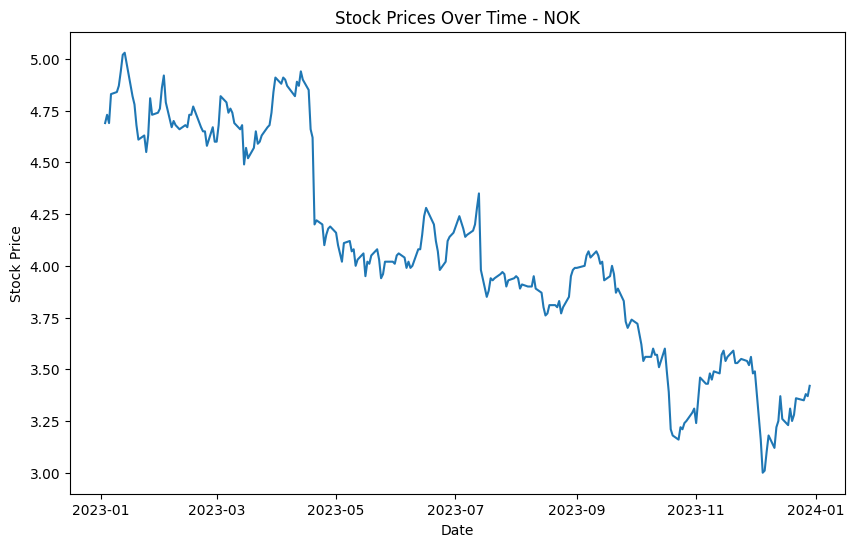

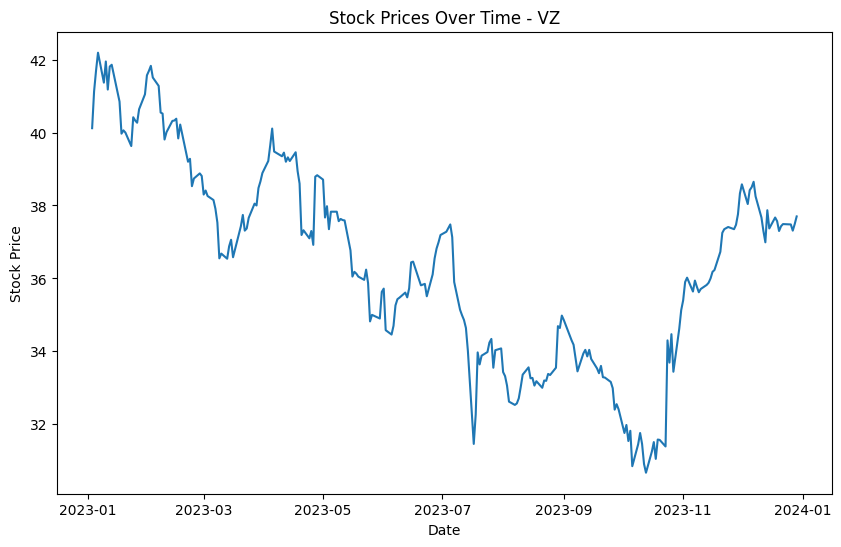

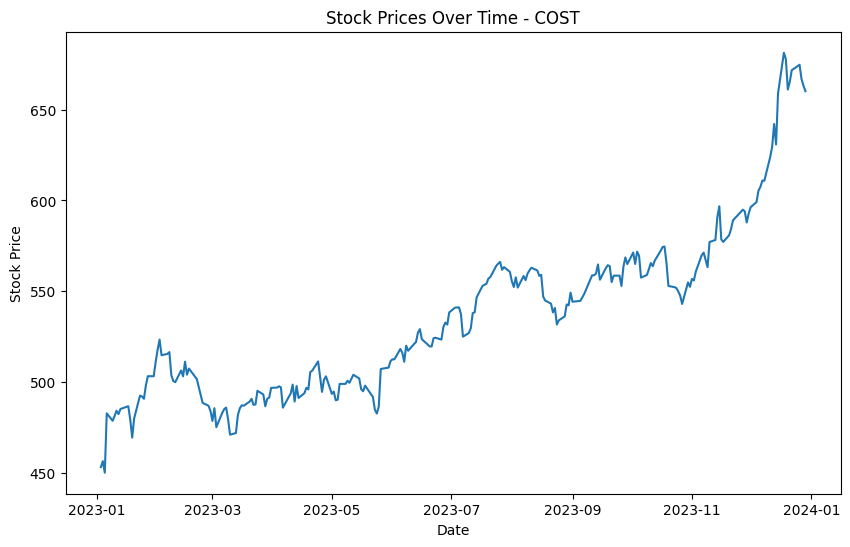

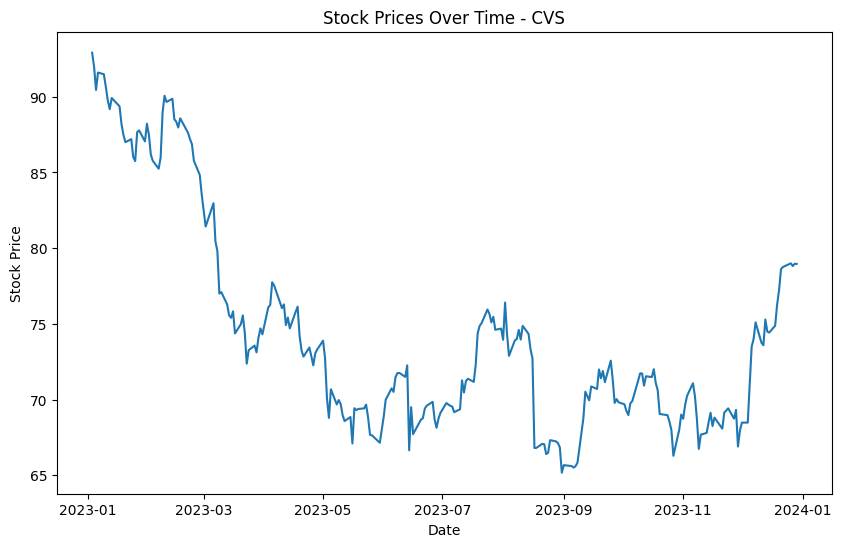

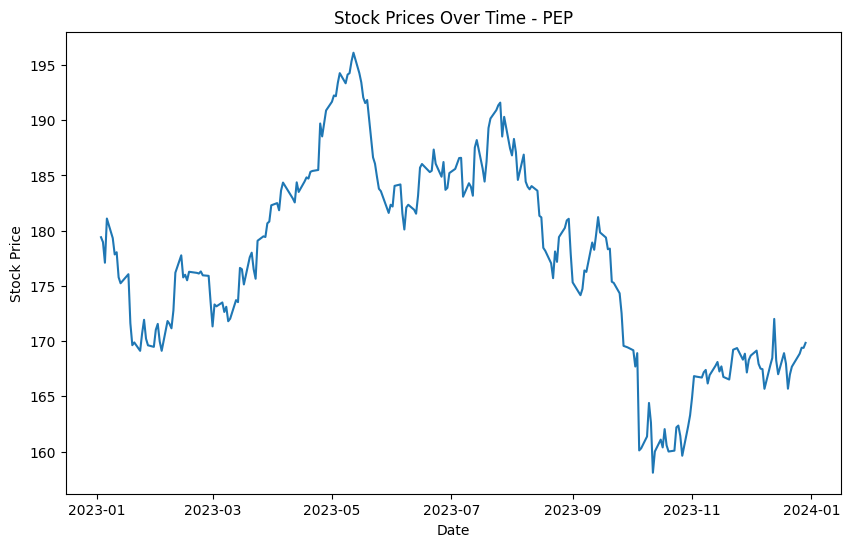

In [ ]:
import matplotlib.pyplot as plt
print(combined_data.columns)

for ticker in stock_tickers:
    stock_data = combined_data[combined_data['Ticker'] == ticker]
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Prices Over Time - {ticker}')
    plt.show()


**Writting to Kafka**

In [ ]:
from kafka import KafkaProducer

# Create a dictionary to store individual DataFrames for each stock
dfs = {}

# Since 'combined_data' has a 'Ticker' column
for ticker, ticker_data in combined_data.groupby('Ticker'):
    dfs[ticker.lower()] = ticker_data

def error_callback(exc):
    raise Exception('Error while sending data to Kafka: {0}'.format(str(exc)))

def write_to_kafka(dfs):
    producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])

    for topic_name, dataframe in dfs.items():
        count = 0

        for index, row in dataframe.iterrows():
            key = str(index)
            value = row.to_json()
            producer.send(topic_name, key=key.encode('utf-8'), value=value.encode('utf-8')).add_errback(error_callback)
            count += 1

        print("Wrote {0} messages into topic: {1}".format(count, topic_name))

    producer.flush()

write_to_kafka(dfs)


Wrote 250 messages into topic: aap


Wrote 250 messages into topic: aapl


Wrote 250 messages into topic: adbe


Wrote 250 messages into topic: amat


Wrote 250 messages into topic: amd


Wrote 250 messages into topic: amzn


Wrote 250 messages into topic: ba


Wrote 250 messages into topic: bac


Wrote 365 messages into topic: btc-cad


Wrote 250 messages into topic: c
Wrote 250 messages into topic: cmcsa


Wrote 250 messages into topic: cost


Wrote 250 messages into topic: csco
Wrote 250 messages into topic: cvs


Wrote 250 messages into topic: cvx


Wrote 250 messages into topic: dal
Wrote 250 messages into topic: dis


Wrote 250 messages into topic: f


Wrote 250 messages into topic: ford


Wrote 250 messages into topic: ge


Wrote 250 messages into topic: gm


Wrote 250 messages into topic: gme


Wrote 250 messages into topic: goog


Wrote 250 messages into topic: googl


Wrote 250 messages into topic: gs


Wrote 250 messages into topic: hd


Wrote 250 messages into topic: hmc
Wrote 250 messages into topic: hymtf


Wrote 250 messages into topic: ibm


Wrote 250 messages into topic: intc
Wrote 250 messages into topic: jpm


Wrote 250 messages into topic: ko


Wrote 250 messages into topic: ma


Wrote 250 messages into topic: mdc


Wrote 250 messages into topic: mmm


Wrote 250 messages into topic: ms


Wrote 250 messages into topic: msft


Wrote 250 messages into topic: msi


Wrote 250 messages into topic: marketreturns
Wrote 250 messages into topic: nflx


Wrote 250 messages into topic: nke


Wrote 250 messages into topic: nok


Wrote 250 messages into topic: nvda
Wrote 250 messages into topic: pep
Wrote 250 messages into topic: pfe


Wrote 250 messages into topic: pypl


Wrote 250 messages into topic: roku


Wrote 250 messages into topic: sbux


Wrote 250 messages into topic: snap
Wrote 250 messages into topic: spg

Wrote 250 messages into topic: stla
Wrote 250 messages into topic: t


Wrote 250 messages into topic: tm


Wrote 250 messages into topic: tsla


Wrote 250 messages into topic: v


Wrote 250 messages into topic: vgt


Wrote 250 messages into topic: vz


Wrote 250 messages into topic: wfc


Wrote 250 messages into topic: wmt
Wrote 250 messages into topic: xom


**Setting up Spark Environment**

In [ ]:
!pip install pyspark
from pyspark.sql.functions import col
from datetime import date
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql import Row
from pyspark.ml.feature import VectorAssembler, StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425361 sha256=8af9b78340eeafebf2ab64d243ee4634a81db6c0cfaa2d219ec07b1d09fd91b7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


**Creating and manipulating a PySpark DataFrame from a pandas DataFrame that contains stock data**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DateType

# We do this so that we are able to change the Date from the index to become a column
#otherwise we will have an error if we continue using the Date below without changing it from index

combined_data = combined_data.reset_index()

# Create Spark session
spark = SparkSession.builder.appName("StockData").getOrCreate()

# Convert 'Date' column to Spark DateType
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data = combined_data.dropna(subset=['Date'])

# Create PySpark DataFrame
spark_df = spark.createDataFrame(combined_data)

# Explicitly convert 'Date' column to DateType
spark_df = spark_df.withColumn('Date', F.to_date('Date').cast(DateType()))

# Renaming the 'Adj Close' column to 'Adj_Close'
spark_df = spark_df.withColumnRenamed("Adj Close", "Adj_Close")

# Show the DataFrame
spark_df.show()


+----------+------------------+------------------+------------------+------------------+------------------+----------+------+
|      Date|              Open|              High|               Low|             Close|         Adj_Close|    Volume|Ticker|
+----------+------------------+------------------+------------------+------------------+------------------+----------+------+
|2023-01-03|130.27999877929688|130.89999389648438|124.16999816894531|125.06999969482422|124.37480163574219|1.121175E8|  AAPL|
|2023-01-04|126.88999938964844|128.66000366210938|125.08000183105469|126.36000061035156|125.65763854980469| 8.91136E7|  AAPL|
|2023-01-05|127.12999725341797| 127.7699966430664|124.76000213623047| 125.0199966430664|124.32508087158203| 8.09627E7|  AAPL|
|2023-01-06|126.01000213623047| 130.2899932861328|124.88999938964844| 129.6199951171875|128.89952087402344| 8.77547E7|  AAPL|
|2023-01-09|130.47000122070312|133.41000366210938|129.88999938964844|130.14999389648438|129.42657470703125| 7.07908E7|

**Converting a Pandas DataFrame to a Spark DataFrame using PySpark and then create an RDD from the PySpark DataFrame using the rdd attribute**


In [ ]:
from pyspark.sql import SparkSession

# We use 'combined_data' as our Pandas DataFrame
spark = SparkSession.builder.appName("StockData").getOrCreate()
spark_df = spark.createDataFrame(combined_data)
# Renaming the 'Adj Close' column to 'Adj_Close'
spark_df = spark_df.withColumnRenamed("Adj Close", "Adj_Close")
rdd = spark_df.rdd
spark_df.show()
column_names = spark_df.columns
print(column_names)

+-------------------+------------------+------------------+------------------+------------------+------------------+----------+------+
|               Date|              Open|              High|               Low|             Close|         Adj_Close|    Volume|Ticker|
+-------------------+------------------+------------------+------------------+------------------+------------------+----------+------+
|2023-01-03 00:00:00|130.27999877929688|130.89999389648438|124.16999816894531|125.06999969482422|124.37480163574219|1.121175E8|  AAPL|
|2023-01-04 00:00:00|126.88999938964844|128.66000366210938|125.08000183105469|126.36000061035156|125.65763854980469| 8.91136E7|  AAPL|
|2023-01-05 00:00:00|127.12999725341797| 127.7699966430664|124.76000213623047| 125.0199966430664|124.32508087158203| 8.09627E7|  AAPL|
|2023-01-06 00:00:00|126.01000213623047| 130.2899932861328|124.88999938964844| 129.6199951171875|128.89952087402344| 8.77547E7|  AAPL|
|2023-01-09 00:00:00|130.47000122070312|133.41000366210

**Performing feature engineering and calculating the beta feature using RDD map**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("StockData").getOrCreate()

# Creating PySpark DataFrame
spark_df = spark.createDataFrame(combined_data)

# Calculating Daily Returns for Each Stock
window_spec = Window.partitionBy('Ticker').orderBy('Date')
spark_df = spark_df.withColumn('DailyReturn', F.col('Close') / F.lag('Close').over(window_spec) - 1)

# Calculating Daily Returns for the Market
market_col = 'Close'
spark_df = spark_df.withColumn('MarketReturn', F.col(market_col) / F.lag(market_col).over(Window.orderBy('Date')) - 1)

# Calculating Cumulative Return
window_spec_cumulative = Window.partitionBy('Ticker').orderBy('Date').rowsBetween(Window.unboundedPreceding, 0)
spark_df = spark_df.withColumn('CumulativeReturn', F.sum('DailyReturn').over(window_spec_cumulative))

# Renaming the 'Adj Close' column to 'Adj_Close for compatibility'
spark_df = spark_df.withColumnRenamed("Adj Close", "Adj_Close")

# Define a function to calculate beta
def calculate_beta(iterator):
    prev_market_return = None
    prev_stock_return = None

    for row in iterator:
        date = row['Date']
        open_price = row['Open']
        high = row['High']
        low = row['Low']
        closing_price = row['Close']
        adj_close = row['Adj_Close']
        volume = row['Volume']
        symbol = row['Ticker']
        daily_return = row['DailyReturn']
        cumulative_return = row['CumulativeReturn']
        market_return = row['MarketReturn']

        # Skip the row if any of the necessary values are None
        if (
            prev_market_return is not None
            and market_return is not None
            and prev_market_return is not None
            and (market_return - prev_market_return) != 0
            and daily_return is not None
            and prev_stock_return is not None
        ):
            # Calculate beta
            beta = (daily_return - prev_stock_return) / (market_return - prev_market_return)

            yield (
                date,
                open_price,
                high,
                low,
                closing_price,
                adj_close,
                volume,
                symbol,
                daily_return,
                market_return,
                cumulative_return,
                beta
            )

        # Update previous returns for the next iteration
        prev_market_return = market_return
        prev_stock_return = daily_return


# Sort the DataFrame by Date and Symbol, then calculate beta using mapPartitions
sorted_df = spark_df.sort("Ticker", "Date")
indexed_rdd = sorted_df.rdd.mapPartitions(calculate_beta)

# Convert the RDD to a DataFrame
result_df = indexed_rdd.toDF([
    'Date',
    'Open',
    'High',
    'Low',
    'Close',
    'Adj_Close',
    'Volume',
    'Symbol',
    'CumulativeReturn',
    'DailyReturn',
    'MarketReturn',
    'Beta'
])

# Show the resulting DataFrame
result_df.show()


+-------------------+------------------+------------------+------------------+------------------+------------------+---------+------+--------------------+------------------+--------------------+--------------------+
|               Date|              Open|              High|               Low|             Close|         Adj_Close|   Volume|Symbol|    CumulativeReturn|       DailyReturn|        MarketReturn|                Beta|
+-------------------+------------------+------------------+------------------+------------------+------------------+---------+------+--------------------+------------------+--------------------+--------------------+
|2023-01-05 00:00:00| 150.4499969482422|154.44000244140625| 149.8800048828125|153.16000366210938|149.38206481933594| 795700.0|   AAP|0.008361342271145489|3.3474313270566425|0.010671003872190665|-0.08737673716485979|
|2023-01-06 00:00:00| 153.6699981689453|155.74000549316406| 153.3300018310547|154.02000427246094|150.22084045410156| 718200.0|   AAP|0.0

**Beta** is a measure of how much a stock moves relative to the market as a whole. A beta of 1 means the stock moves in sync with the market, a beta of less than 1 means the stock is less volatile than the market, and a beta of more than 1 means the stock is more volatile than the market.






**1.Negative Beta (less than 0)**:

**Interpretation**: A negative beta indicates an inverse relationship with the market. When the market goes up, stocks with negative beta tend to go down, and vice versa.

**Meaning for Stock**: The stock tends to move in the opposite direction of the market. This might be the case for investments that are considered "safe havens" during market downturns, such as certain types of bonds.


**2.Beta around 0**:

**Interpretation**: A beta close to zero suggests that the stock's returns are not correlated with the market returns.

**Meaning for Stock**: The stock is not influenced much by the overall market movements. It might be affected more by company-specific factors than by the market.


**3.Beta around 1**:

**Interpretation**: A beta of 1 indicates that the stock tends to move in tandem with the market. If the market goes up by 1%, the stock, on average, also goes up by 1%, and vice versa.

**Meaning for Stock**: The stock is expected to have returns in line with the overall market. It is considered to have average market risk.


**4.Beta greater than 1**:

**Interpretation**: A beta greater than 1 means the stock is more volatile than the market. It tends to magnify the market's moves, both up and down.

**Meaning for Stock**: The stock is considered more risky than the market. It has the potential for higher returns but also higher losses. This might be the case for stocks of smaller companies or those in more volatile sectors.






**Point to Note**
**Remember**:
 Beta is a historical measure, and it doesn't guarantee future performance. It's also important to consider other factors and not rely solely on beta when making investment decisions.